In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import datetime
import scipy
import scipy.stats as stats
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Exploratory Data Analysis and Data Cleaning

In [3]:
data=pd.read_csv('Desktop/transaction_data.csv')
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [4]:
data.Country.value_counts().reset_index().head(20)

,index,Country
0,United Kingdom,990956
1,Germany,18990
2,France,17114
3,EIRE,16392
4,Spain,5066
5,Netherlands,4742
6,Belgium,4138
7,Switzerland,4004
8,Portugal,3038
9,Australia,2518


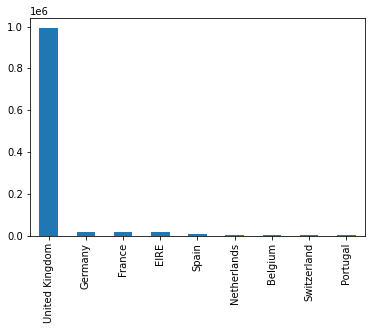

In [5]:
data.Country.value_counts()[:9].plot(kind='bar')

In [6]:
print('The TOP 5 Users with most number of orders')
data.sort_values(by='TransactionId', ascending=False).head()

The TOP 5 Users with most number of orders


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
675418,266280,6397457,Wed Feb 20 08:50:00 IST 2019,474873,PACK OF 20 SPACEBOY NAPKINS,36,1.18,France
997865,266280,6397457,Wed Feb 20 08:50:00 IST 2019,488334,CHILDRENS CUTLERY DOLLY GIRL,12,5.73,France
297803,266280,6397457,Wed Feb 20 08:50:00 IST 2019,475209,SPACEBOY LUNCH BOX,36,2.70,France
979138,266280,6397457,Wed Feb 20 08:50:00 IST 2019,488355,CHILDRENS CUTLERY CIRCUS PARADE,12,5.73,France
627397,266280,6397457,Wed Feb 20 08:50:00 IST 2019,473676,PLASTERS IN TIN CIRCUS PARADE,36,2.28,France


In [7]:
#Most buyers are from the United Kingdom -> Almost 91% of buyers

In [8]:
data.UserId.unique().shape

(4373,)

In [9]:
# 4373 Unique users

In [10]:
data.TransactionId.unique().shape

(25900,)

In [11]:
data.ItemDescription.unique().shape

(4224,)

In [12]:
#Multiple transactions of the same product

In [13]:
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [14]:
data['Total']=data.NumberOfItemsPurchased*data.CostPerItem
data['Total'].head()

0    70.38
1    10.56
2    64.80
3     5.19
4    10.20
Name: Total, dtype: float64

In [15]:
money_spent = data.groupby(by=['UserId','Country'], as_index=False)['Total'].sum()

print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='Total', ascending=False).head()

The TOP 5 customers with highest money spent...


,UserId,Country,Total
1063,288687,United Kingdom,8.142170e+07
7,-1,United Kingdom,1.176908e+07
1720,307566,Netherlands,2.320467e+06
4250,380142,United Kingdom,2.125736e+06
3775,366450,United Kingdom,1.554581e+06


In [16]:
#remove Negative transactions
data=data[~(data['Total']<=0)]

In [17]:
#The dataset contains an outlier transaction made in the year 2028. 
#Keeping this data would prove as an hinderance to Recency analysis
a=data[(data['TransactionTime'].str.contains("2028"))]
a.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Total
150,-1,5914326,Fri Feb 18 14:36:00 IST 2028,446418,VICTORIAN SEWING BOX LARGE,3,35.18,United Kingdom,105.54
241,366870,5912049,Fri Feb 18 05:57:00 IST 2028,473613,PLASTERS IN TIN SKULLS,36,2.28,United Kingdom,82.08
248,-1,5914073,Fri Feb 18 11:34:00 IST 2028,464289,FULL ENGLISH BREAKFAST PLATE,3,10.52,United Kingdom,31.56
281,-1,5914326,Fri Feb 18 14:36:00 IST 2028,1764126,MAGIC TREE -PAPER FLOWERS,3,2.30,United Kingdom,6.90
500,-1,5914062,Fri Feb 18 11:33:00 IST 2028,475083,BOX OF VINTAGE JIGSAW BLOCKS,3,15.21,United Kingdom,45.63


In [18]:
#removing transactions made in the year 2028
data=data[~(data['TransactionTime'].str.contains("2028"))]
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Total
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,10.20


In [19]:
data=data[~(data.UserId.isnull())]
print(data.shape)
data.head()

(1054484, 9)


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Total
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,10.20


In [20]:
#Remove rows where userID = -1

In [21]:
data=data[~(data.UserId==-1)]
print(data.shape)
data.head()

(793548, 9)


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Total
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,42.24


In [22]:
#Convert the time into a correct timestamp

In [23]:
data['TransactionTime'] =data['TransactionTime'].str.replace(r'IST', '')
data['TransactionTime'] = pd.to_datetime(data['TransactionTime'],format = '%c')
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Total
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,42.24


In [24]:
data['TransactionTime_year'] = data['TransactionTime'].dt.year
data['TransactionTime_month'] = data['TransactionTime'].dt.month
data['TransactionTime_hour'] = data['TransactionTime'].dt.hour
data['TransactionTime_year_month'] = (
    data['TransactionTime'].dt.year.astype('str') + '_' +
    data['TransactionTime'].dt.month.astype('str').str.zfill(2)
)
data['TransactionTime_dayofweek'] = data['TransactionTime'].dt.dayofweek

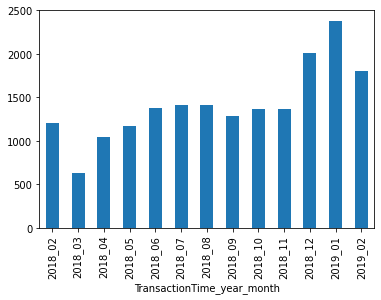

In [25]:
data.groupby('TransactionTime_year_month')['TransactionId'].nunique().plot.bar()


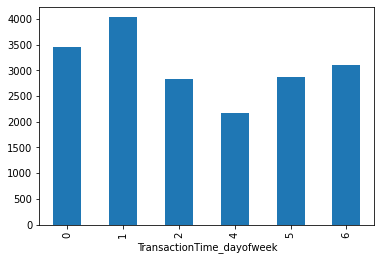

In [26]:
data.groupby('TransactionTime_dayofweek')['TransactionId'].nunique().plot.bar()

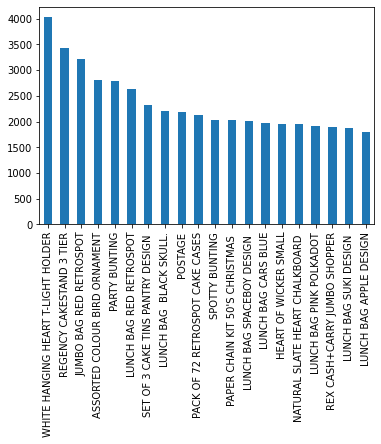

In [27]:
data['ItemDescription'].value_counts().head(20).plot.bar()

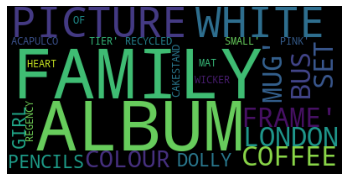

In [28]:

text = data['ItemDescription'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [29]:
country_count = (
    data[['TransactionId', 'Country']].groupby('Country')['TransactionId'].nunique()
    .sort_values(ascending=False).to_frame('count')
)
country_count['percentage'] = country_count['count'] / country_count['count'].sum() * 100
country_count.head(10)

,count,percentage
Country,,
United Kingdom,16579,89.805536
Germany,456,2.470072
France,387,2.096311
EIRE,260,1.408374
Belgium,98,0.530849
Netherlands,94,0.509182
Spain,90,0.487514
Australia,57,0.308759
Portugal,57,0.308759


In [30]:
#RFM ANALYSIS

In [31]:
#Reference date -> one day after the last transaction

In [32]:
data=data[~(data.UserId==-1)]
reference_date=data.TransactionTime.max()
reference_date=reference_date+datetime.timedelta(days=1)#timedelta function returns to total number of seconds
print(data.TransactionTime.max(),data.TransactionTime.min())
reference_date

2019-02-20 08:50:00 2018-02-12 04:26:00


Timestamp('2019-02-21 08:50:00')

In [33]:
data['days_since_last_purchase']=reference_date-data.TransactionTime
data['days_since_last_purchase_num']=data['days_since_last_purchase'].astype('timedelta64[D]')
data['days_since_last_purchase_num'].head()   

0     18.0
1     56.0
2      5.0
3    244.0
5     40.0
Name: days_since_last_purchase_num, dtype: float64

In [34]:
customer_segment_df=data.groupby('UserId').min().reset_index()[['UserId', 'days_since_last_purchase_num']]
customer_segment_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
print(customer_segment_df.describe())
customer_segment_df.head()

              UserId      Recency
count    4333.000000  4333.000000
mean   321306.072698    92.219478
std     36160.315701    99.635363
min    259266.000000     1.000000
25%    290094.000000    18.000000
50%    321300.000000    51.000000
75%    352359.000000   141.000000
max    384027.000000   374.000000


,UserId,Recency
0,259266,326.0
1,259287,2.0
2,259308,75.0
3,259329,19.0
4,259350,310.0


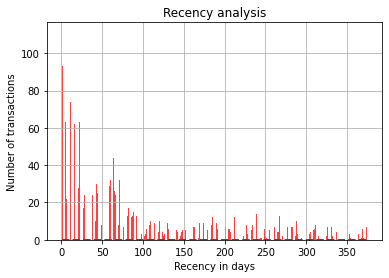

In [35]:
x=customer_segment_df.Recency
mu=np.mean(x)
sigma=math.sqrt(np.var(x))
n,bins,patches=plt.hist(x,1000,facecolor='red',alpha=0.75)
y=scipy.stats.norm.pdf(bins,mu,sigma)
l=plt.plot(bins,y,'r--',lw=2)

plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title('Recency analysis')
plt.grid(True)
plt.show()

In [36]:
customer_monetary_val=data[['UserId','Total']].groupby('UserId').sum().reset_index()
customer_segment_df=customer_segment_df.merge(customer_monetary_val,how='outer')
customer_segment_df.Amount=customer_segment_df.Total+0.001
customer_freq=data[['UserId','Total']].groupby('UserId').count().reset_index()
customer_freq.rename(columns={'Total':'Frequency'},inplace=True)
customer_segment_df=customer_segment_df.merge(customer_freq,how='outer')

customer_segment_df=pd.DataFrame(customer_segment_df,columns=['UserId','Recency','Total','Frequency'])
customer_segment_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,UserId,Recency,Total,Frequency
0,259266,326.0,641217.60,2
1,259287,2.0,29856.36,302
2,259308,75.0,14963.04,62
3,259329,19.0,14571.84,146
4,259350,310.0,2774.40,34


In [37]:
quartiles = customer_segment_df.quantile(q=[0.25,0.50,0.75])
#Basically defines on what percentage the values lie in
#25% is 0.25, 50% is .5 and so on
#for an example if we have 100 values, then the top 25 lie in the 1st quartile

In [38]:
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    


def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4



rfmSeg = customer_segment_df
rfmSeg['R_Quartile'] = rfmSeg['Recency'].apply(RClass, args=('Recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['Frequency'].apply(FMClass, args=('Frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['Total'].apply(FMClass, args=('Total',quartiles,))

In [39]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [40]:
rfmSeg.head()

,UserId,Recency,Total,Frequency,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,259266,326.0,641217.60,2,1,1,4,114
1,259287,2.0,29856.36,302,4,4,4,444
2,259308,75.0,14963.04,62,2,2,4,224
3,259329,19.0,14571.84,146,3,3,4,334
4,259350,310.0,2774.40,34,1,1,2,112


In [41]:
rfmSeg['Total_Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
rfmSeg.head()

,UserId,Recency,Total,Frequency,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total_Score
0,259266,326.0,641217.60,2,1,1,4,114,6
1,259287,2.0,29856.36,302,4,4,4,444,12
2,259308,75.0,14963.04,62,2,2,4,224,8
3,259329,19.0,14571.84,146,3,3,4,334,10
4,259350,310.0,2774.40,34,1,1,2,112,4


In [42]:
print("Best Customers: ",len(rfmSeg[rfmSeg['RFMClass']=='444']))
print('Loyal Customers: ',len(rfmSeg[rfmSeg['F_Quartile']==4]))
print("Big Spenders: ",len(rfmSeg[rfmSeg['M_Quartile']==4]))
print('Almost Lost: ', len(rfmSeg[rfmSeg['RFMClass']=='421']))
print('Lost Customers: ',len(rfmSeg[rfmSeg['RFMClass']=='211']))
print('Lost Cheap Customers: ',len(rfmSeg[rfmSeg['RFMClass']=='111']))

Best Customers:  447
Loyal Customers:  1077
Big Spenders:  1083
Almost Lost:  28
Lost Customers:  177
Lost Cheap Customers:  383


In [43]:
def rfm_level(df):
    if df['Total_Score'] >= 9:
        return 'Best Customers'
    elif ((df['Total_Score'] >= 8) and (df['Total_Score'] < 9)):
        return 'Good Buyers'
    elif ((df['Total_Score'] >= 7) and (df['Total_Score'] < 8)):
        return 'Loyal Customers'
    elif ((df['Total_Score'] >= 6) and (df['Total_Score'] < 7)):
        return 'Potential Customers'
    elif ((df['Total_Score'] >= 5) and (df['Total_Score'] < 6)):
        return 'Promising Customers'
    elif ((df['Total_Score'] >= 4) and (df['Total_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Very inactive'
rfmSeg['RFM_Level'] = rfmSeg.apply(rfm_level, axis=1)
rfmSeg.head() 

,UserId,Recency,Total,Frequency,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total_Score,RFM_Level
0,259266,326.0,641217.60,2,1,1,4,114,6,Potential Customers
1,259287,2.0,29856.36,302,4,4,4,444,12,Best Customers
2,259308,75.0,14963.04,62,2,2,4,224,8,Good Buyers
3,259329,19.0,14571.84,146,3,3,4,334,10,Best Customers
4,259350,310.0,2774.40,34,1,1,2,112,4,Needs Attention


In [44]:
result = rfmSeg[['UserId','RFMClass','RFM_Level']]
result.head()

,UserId,RFMClass,RFM_Level
0,259266,114,Potential Customers
1,259287,444,Best Customers
2,259308,224,Good Buyers
3,259329,334,Best Customers
4,259350,112,Needs Attention


In [45]:
result.to_csv('Desktop/output.csv', encoding='utf-8', index=False)


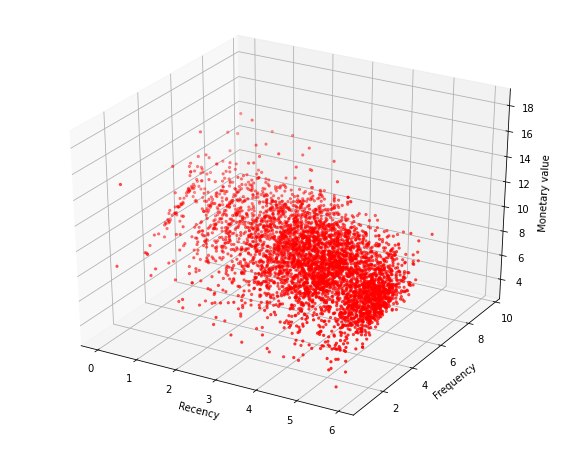

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=customer_segment_df.Recency.apply(math.log)
ys=customer_segment_df.Frequency.apply(math.log)
zs=customer_segment_df.Total.apply(math.log)
ax.scatter(xs,ys,zs,s=5,color='red')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [47]:
RFM_count = (
    rfmSeg[['UserId', 'RFM_Level']].groupby('RFM_Level')['UserId'].nunique()
    .sort_values(ascending=False).to_frame('count')
)
RFM_count['percentage'] = RFM_count['count'] / RFM_count['count'].sum() * 100
RFM_count.head(10)

,count,percentage
RFM_Level,,
Best Customers,1679,38.749135
Promising Customers,515,11.885530
Potential Customers,462,10.662359
Loyal Customers,459,10.593123
Good Buyers,454,10.477729
Very inactive,383,8.839141
Needs Attention,381,8.792984


In [48]:
data['UserId'].nunique()


4333